# Test loading tristan data
Here we test the restart loader libraries

In [1]:
#Need this to add libraries in parent folder
import sys
sys.path.append('..')
sys.path.append('.')
sys.path.append('../lib')

In [2]:
import lib.analysis as anl 
import lib.array_ops as ao
import lib.data_h5 as dh5
import lib.data_netcdf4 as dnc
import lib.data_tristan as dtr
import lib.fpc as fpc
import lib.frametransform as ft
import lib.metadata as md

import lib.plot.oned as plt1d
import lib.plot.twod as plt2d
import lib.plot.debug as pltdebug
import lib.plot.fourier as pltfr
import lib.plot.resultsmanager as rsltmng
import lib.plot.velspace as pltvv

import os
import math
import numpy as np

In [62]:
#block to reload modules. Call this block after editing libraries
import importlib
importlib.reload(anl)
importlib.reload(ao)
importlib.reload(dh5)
importlib.reload(dnc)
importlib.reload(fpc)
importlib.reload(ft)
importlib.reload(md)
importlib.reload(plt1d)
importlib.reload(plt2d)
importlib.reload(pltdebug)
importlib.reload(pltfr)
importlib.reload(rsltmng)
importlib.reload(pltvv)

<module 'lib.plot.velspace' from '/home/collbrown/dHybridR/analysis/dHybridRAnalysis/notebooks/../lib/plot/velspace.py'>

### Load data

In [3]:
path = '/srv/data/simulation/tristan/mach12_2000'
path_fields = path+'/flds.tot.{:03d}'
path_par = path+'/prtl.tot.{:03d}'

In [4]:
dpar_elc, dpar_ion = dtr.load_particles(path_par,7)

In [5]:
dfields = dtr.load_fields(path_fields,7)

In [6]:
dfields['ex'].shape

(1, 6, 22205)

In [46]:
dfields = dtr.estimate_grid_setup(dfields, dpar_ion)

### Transform fields

In [24]:
#can't transform fields as we only have one time slice
vshock = 0.

### Plot fields

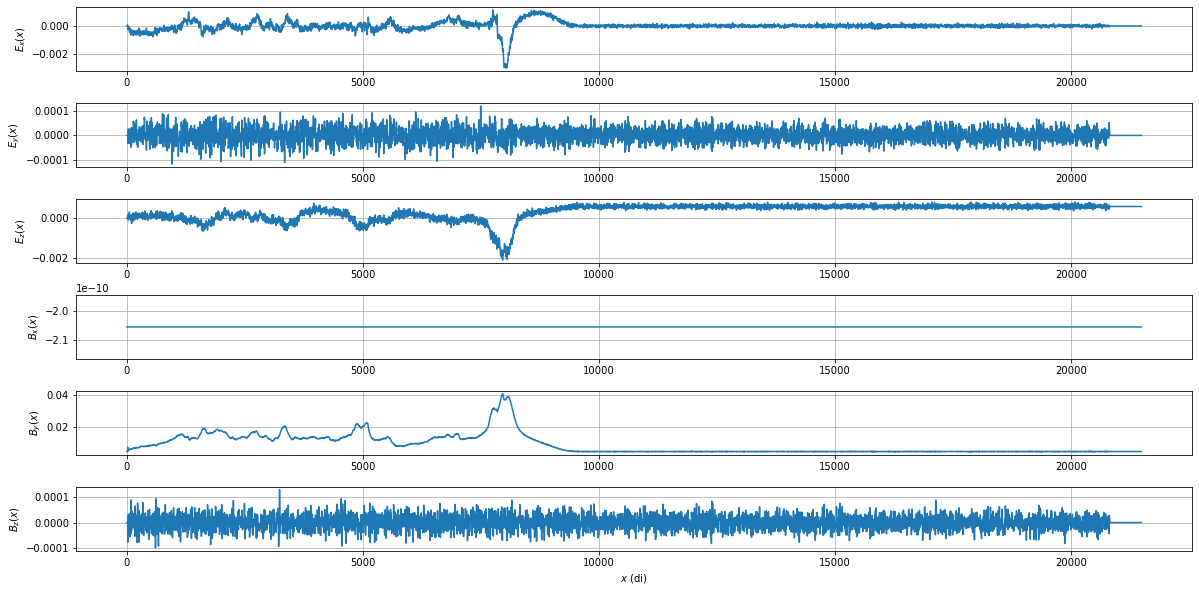

In [9]:
plt1d.plot_all_fields(dfields, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

### Do transform for ions

In [89]:
vmax = 1.
dv = .005
x1 = 8000.
x2 = 9000.
y1 = 3.0
y2 = 4.0
z1 = 3.0
z2 = 4.0

dpar_ion['x1'] = dpar_ion['xi']
dpar_ion['x2'] = dpar_ion['yi']
dpar_ion['x3'] = dpar_ion['zi']
dpar_ion['p1'] = dpar_ion['ui']
dpar_ion['p2'] = dpar_ion['vi']
dpar_ion['p3'] = dpar_ion['wi']

fieldkey = 'ex'
directionkey = str(fieldkey[1])
dfields[fieldkey+'_xx'] = np.asarray(dfields[fieldkey+'_xx'])
dfields[fieldkey+'_yy'] = np.asarray(dfields[fieldkey+'_yy'])
dfields[fieldkey+'_zz'] = np.asarray(dfields[fieldkey+'_zz'])
vx, vy, vz, totalPtcl, totalFieldpts, hist_ion, CEx_ion = fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dpar_ion, dfields, vshock, fieldkey, directionkey)

fieldkey = 'ey'
directionkey = str(fieldkey[1])
dfields[fieldkey+'_xx'] = np.asarray(dfields[fieldkey+'_xx'])
dfields[fieldkey+'_yy'] = np.asarray(dfields[fieldkey+'_yy'])
dfields[fieldkey+'_zz'] = np.asarray(dfields[fieldkey+'_zz'])
vx, vy, vz, totalPtcl, totalFieldpts, hist_ion, CEy_ion = fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dpar_ion, dfields, vshock, fieldkey, directionkey)

fieldkey = 'ez'
directionkey = str(fieldkey[1])
dfields[fieldkey+'_xx'] = np.asarray(dfields[fieldkey+'_xx'])
dfields[fieldkey+'_yy'] = np.asarray(dfields[fieldkey+'_yy'])
dfields[fieldkey+'_zz'] = np.asarray(dfields[fieldkey+'_zz'])
vx, vy, vz, totalPtcl, totalFieldpts, hist_ion, CEz_ion = fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dpar_ion, dfields, vshock, fieldkey, directionkey)

In [90]:
vx_xy,vy_xz = ao.mesh_3d_to_2d(vx,vy,vz,'xy')
vx_xz,vz_xz = ao.mesh_3d_to_2d(vx,vy,vz,'xz')
vy_yz,vz_yz = ao.mesh_3d_to_2d(vx,vy,vz,'yz')
H_xyi = ao.array_3d_to_2d(hist_ion,'xy')
H_xzi = ao.array_3d_to_2d(hist_ion,'xz')
H_yzi = ao.array_3d_to_2d(hist_ion,'yz')
CEx_xyi = ao.array_3d_to_2d(CEx_ion,'xy')
CEx_xzi = ao.array_3d_to_2d(CEx_ion,'xz')
CEx_yzi = ao.array_3d_to_2d(CEx_ion,'yz')
CEy_xyi = ao.array_3d_to_2d(CEy_ion,'xy')
CEy_xzi = ao.array_3d_to_2d(CEy_ion,'xz')
CEy_yzi = ao.array_3d_to_2d(CEy_ion,'yz')
CEz_xyi = ao.array_3d_to_2d(CEz_ion,'xy')
CEz_xzi = ao.array_3d_to_2d(CEz_ion,'xz')
CEz_yzi = ao.array_3d_to_2d(CEz_ion,'yz')

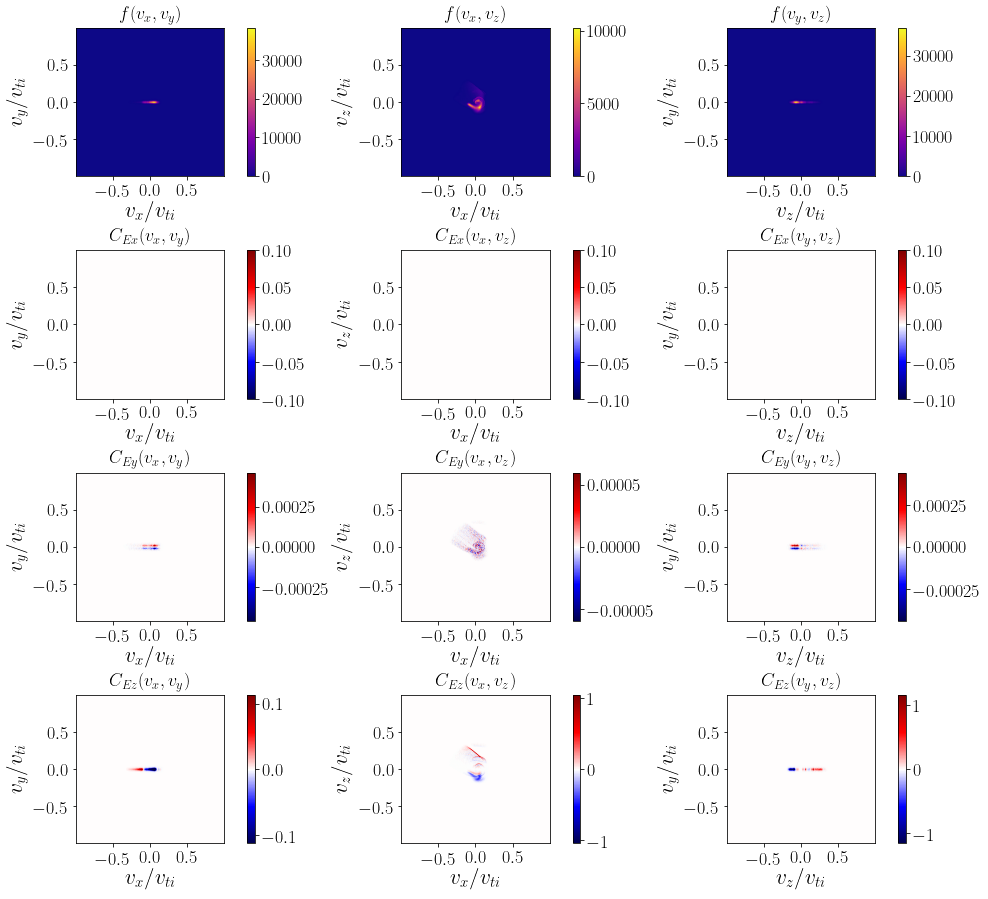

In [98]:
pltvv.plot_cor_and_dist_supergrid(vx, vy, vz, vmax,
                                H_xyi, H_xzi, H_yzi,
                                CEx_xyi,CEx_xzi, CEx_yzi,
                                CEy_xyi,CEy_xzi, CEy_yzi,
                                CEz_xyi,CEz_xzi, CEz_yzi)

In [92]:
for row in H_xy:
    print(row)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

### Do transform for elecs

In [99]:
vmax = 1.
dv = .05
x1 = 8000.
x2 = 9000.
y1 = 3.0
y2 = 4.0
z1 = 3.0
z2 = 4.0

dpar_elc['x1'] = dpar_elc['xe']
dpar_elc['x2'] = dpar_elc['ye']
dpar_elc['x3'] = dpar_elc['ze']
dpar_elc['p1'] = dpar_elc['ue']
dpar_elc['p2'] = dpar_elc['ve']
dpar_elc['p3'] = dpar_elc['we']
dpar_elc['Vframe_relative_to_sim'] = 0.

fieldkey = 'ex'
directionkey = str(fieldkey[1])
dfields[fieldkey+'_xx'] = np.asarray(dfields[fieldkey+'_xx'])
dfields[fieldkey+'_yy'] = np.asarray(dfields[fieldkey+'_yy'])
dfields[fieldkey+'_zz'] = np.asarray(dfields[fieldkey+'_zz'])
vx, vy, vz, totalPtcl, totalFieldpts, hist_elc, CEx_elc = fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dpar_elc, dfields, vshock, fieldkey, directionkey)

fieldkey = 'ey'
directionkey = str(fieldkey[1])
dfields[fieldkey+'_xx'] = np.asarray(dfields[fieldkey+'_xx'])
dfields[fieldkey+'_yy'] = np.asarray(dfields[fieldkey+'_yy'])
dfields[fieldkey+'_zz'] = np.asarray(dfields[fieldkey+'_zz'])
vx, vy, vz, totalPtcl, totalFieldpts, hist_elc, CEy_elc = fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dpar_elc, dfields, vshock, fieldkey, directionkey)

fieldkey = 'ez'
directionkey = str(fieldkey[1])
dfields[fieldkey+'_xx'] = np.asarray(dfields[fieldkey+'_xx'])
dfields[fieldkey+'_yy'] = np.asarray(dfields[fieldkey+'_yy'])
dfields[fieldkey+'_zz'] = np.asarray(dfields[fieldkey+'_zz'])
vx, vy, vz, totalPtcl, totalFieldpts, hist_elc, CEz_elc = fpc.compute_hist_and_cor(vmax, dv, x1, x2, y1, y2, z1, z2, dpar_elc, dfields, vshock, fieldkey, directionkey)

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [100]:
vx_xy,vy_xz = ao.mesh_3d_to_2d(vx,vy,vz,'xy')
vx_xz,vz_xz = ao.mesh_3d_to_2d(vx,vy,vz,'xz')
vy_yz,vz_yz = ao.mesh_3d_to_2d(vx,vy,vz,'yz')
H_xy = ao.array_3d_to_2d(hist_elc,'xy')
H_xz = ao.array_3d_to_2d(hist_elc,'xz')
H_yz = ao.array_3d_to_2d(hist_elc,'yz')
CEx_xy = ao.array_3d_to_2d(CEx_elc,'xy')
CEx_xz = ao.array_3d_to_2d(CEx_elc,'xz')
CEx_yz = ao.array_3d_to_2d(CEx_elc,'yz')
CEy_xy = ao.array_3d_to_2d(CEy_elc,'xy')
CEy_xz = ao.array_3d_to_2d(CEy_elc,'xz')
CEy_yz = ao.array_3d_to_2d(CEy_elc,'yz')
CEz_xy = ao.array_3d_to_2d(CEz_elc,'xy')
CEz_xz = ao.array_3d_to_2d(CEz_elc,'xz')
CEz_yz = ao.array_3d_to_2d(CEz_elc,'yz')

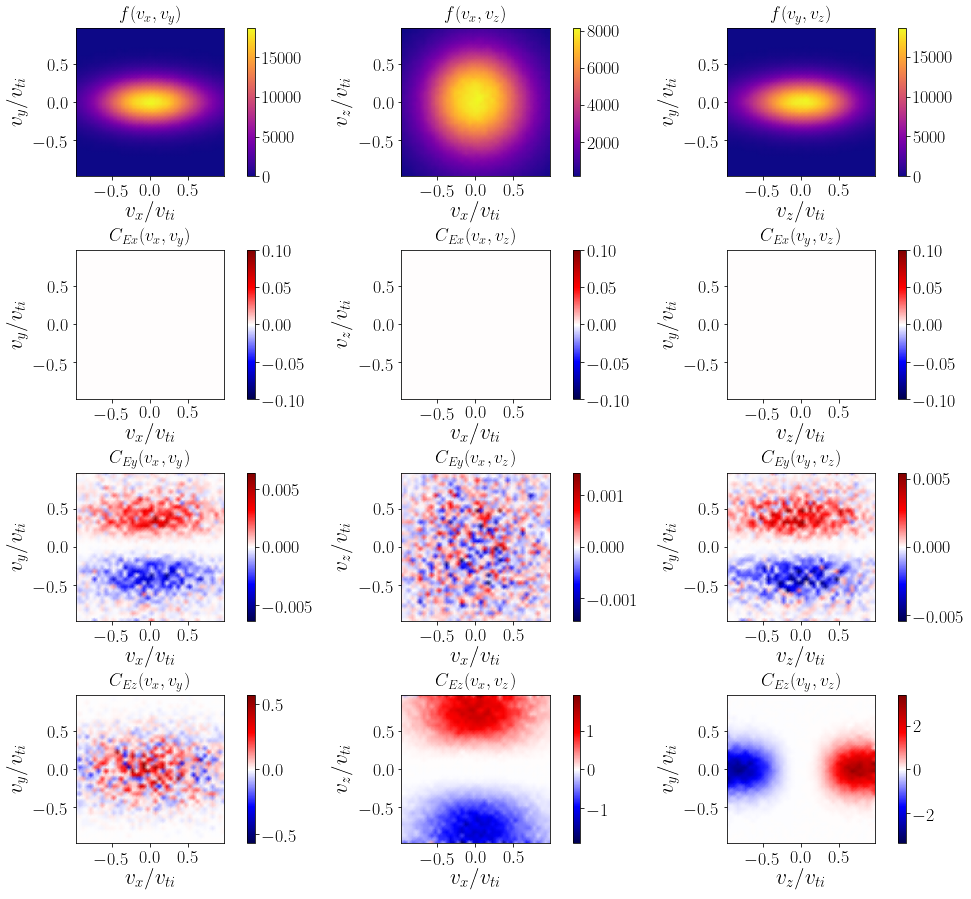

In [101]:
pltvv.plot_cor_and_dist_supergrid(vx, vy, vz, vmax,
                                H_xy, H_xz, H_yz,
                                CEx_xy,CEx_xz, CEx_yz,
                                CEy_xy,CEy_xz, CEy_yz,
                                CEz_xy,CEz_xz, CEz_yz)

#### Debug plots

In [17]:
def debug_hist(data):
    import matplotlib.pyplot as plt
    binsplt = np.linspace(min(data),max(data),1000)
    
    plt.figure()
    plt.hist(data, bins = binsplt)
    
    plt.show()

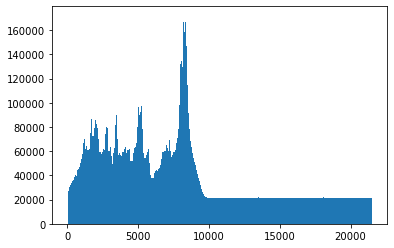

In [18]:
debug_hist(dpar_ion['xi'])

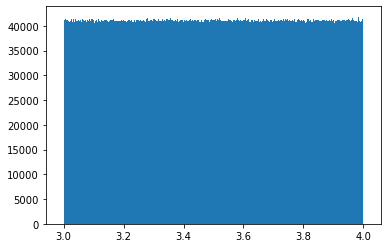

In [19]:
debug_hist(dpar_ion['yi'])

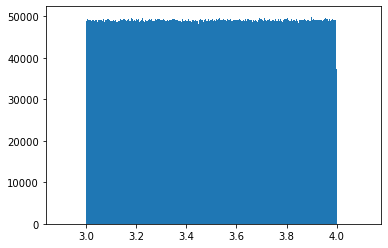

In [20]:
debug_hist(dpar_ion['zi'])

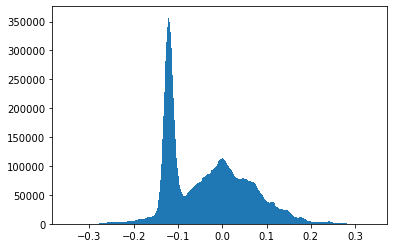

In [57]:
debug_hist(dpar_ion['ui'])

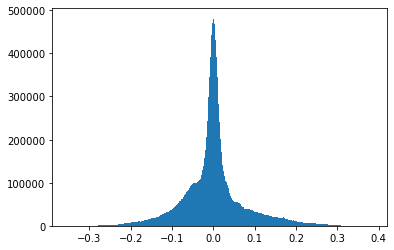

In [59]:
debug_hist(dpar_ion['wi'])

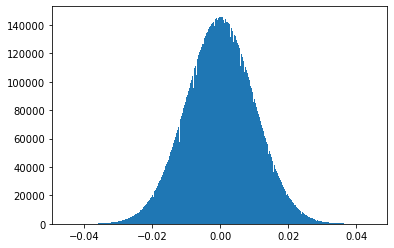

In [60]:
debug_hist(dpar_ion['vi'])